In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#load funda data, correct for price outliers and display first 5 rows
funda = pd.read_csv("funda-amsterdam.csv", encoding="utf-8")
funda_corr = funda[funda["price"] > 100000]
funda_corr.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


In [13]:
#Create a dataframe with 3 variables of your choice from the Funda data set as your independent variables (X). 
funda_sub = funda_corr[['area',"bedrooms", "price", "year_built", "address"]]
funda_sub.head()

,area,bedrooms,price,year_built,address
0,108,2,510000,1906,Knollendamstraat 4 III/IV
1,47,1,215000,1938,Moerdijkstraat 47 1
2,116,2,325000,2003,Zeeburgerdijk 349
3,58,2,315000,1910,Brederodestraat 124 -1
4,63,1,200000,1906,Admiraal De Ruijterweg 409 III


In [14]:
y = funda_sub['price'] #we want to predeict price, it is our dependent variable
X = funda_sub[["area","bedrooms", "year_built"]]
#X = df.loc[:,'action':'metascore'] #this slices the dataframe to include all rows and the columns from "action" to "metascore"
X.index = funda_sub['address'] #this stores the addresses of all the datapoints
X.head()

,area,bedrooms,year_built
address,,,
Knollendamstraat 4 III/IV,108,2,1906
Moerdijkstraat 47 1,47,1,1938
Zeeburgerdijk 349,116,2,2003
Brederodestraat 124 -1,58,2,1910
Admiraal De Ruijterweg 409 III,63,1,1906


In [15]:
#Split the data into a test set and a train set
#split the data, store it into different variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
X_train.head() #The train data

,area,bedrooms,year_built
address,,,
Hoofddorpplein 29 I,47,1,1928
Buiten Kadijken 15,56,1,1980
Bierens de Haanstraat 59,80,2,1945
Koperslagerij 57,43,1,1981
J.J. Cremerplein 30 1,62,1,1911


In [16]:
# create linear regression model with the trainin dataset
lm = LinearRegression() 
model = lm.fit(X_train, y_train)

In [17]:
#checking the coeeficients of each independent variable 
coef = pd.DataFrame(X.columns.values, lm.coef_) 
#this creates a df with a column with the column names, and the coefficients of the model
coef

,0
4453.555902,area
-29580.938172,bedrooms
-1183.563030,year_built


According to this model, the ###

In [21]:
#Evaluate model performance by calculating R2 and RMSE on the test set
# Do not need at add predicted and residual columns to add this it seems. Because you are using it on test set
y_predict = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train...
r2 = r2_score(y_test, y_predict)
print(f"The r-squared value is {r2:.2f}")

The r-squared value is 0.63


Using the three independent variables, the training model explains 63% of observations in the test dataset.

In [19]:
#calculating the RSME
math.sqrt(mean_squared_error(y_test, y_predict))

102115.56736647958

The predited price is off by about 102,000 euros. The RSME is lower in the multiple linear model than in the single linear regression. This is in line with common belief that more data points usually produce better models, with smaller errors.

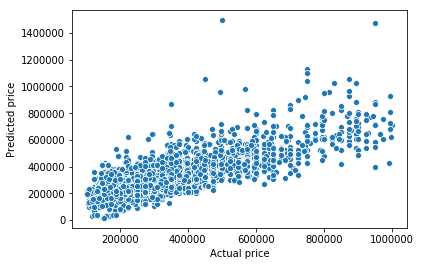

In [24]:
#Make a plot of the predicted price vs. the actual price. Which prices are predicted well?
sns.scatterplot(y_test, y_predict)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.show()

The model makes a better prediction with lower prices than higher prices.

In [ ]:
#